## План
Наша задача заключатся в том, чтобы сделать выводы относительно обучения и указать направления улучшения туториала. Нам предоставлены 2 набора данных для разных платформ. До самого финала исследования обоих датасетов будет проводится по отдельности. Для начала загрузим данные и проведем первичную предобработку, затем преобразуем данные так, чтобы нам было удобнее их визуализировать и в самом конце мы сравним особенности этих датафреймов чтобы сформулировать выводы.

In [271]:
import pandas as pd

import numpy as np

import seaborn as sns
sns.set_theme(style="whitegrid")

from matplotlib import rcParams

import warnings
warnings.filterwarnings("ignore")

## Загрузка и ознакомление с данными

In [81]:
#Перед началом ознакомления, пожалуйста, поменяйте название файла и листов в соответсвии с тем, что находится ниже или раском-
#ментируйте ячейку снизу и впишите ваш вариант
data_man = pd.read_excel('data.xlsx', sheet_name='0') # от слова manual
data_and = pd.read_excel('data.xlsx', sheet_name='1') # от слова android
data_ok = pd.read_excel('data.xlsx', sheet_name='2') # от слова ok

In [ ]:
#data_man = pd.read_excel('ваш вариант', sheet_name='ваш вариант')
#data_and = pd.read_excel('ваш вариант', sheet_name='ваш вариант')
#data_ok = pd.read_excel('ваш вариант', sheet_name='ваш вариант')

для начала, нужно оценить обьем данных, с которым мы работаем

In [29]:
print(f'Размер таблицы data_man - {data_man.shape}')
print('-----------------------------------')
print(f'Размер таблицы data_and - {data_and.shape}')
print('-----------------------------------')
print(f'Размер таблицы data_ok - {data_ok.shape}')

Размер таблицы data_man - (10, 2)
-----------------------------------
Размер таблицы data_and - (998, 8)
-----------------------------------
Размер таблицы data_ok - (1992, 8)


In [27]:
data_man

,Шаг,Действие
0,Туториал: Начало,Загрузка туториала
1,Туториал: Шаг 1,Крути бутылочку
2,Туториал: Шаг 2,Да / Нет
3,Туториал: Шаг 3,Получи подарок
4,Туториал: Шаг 4,Перейди в профиль и сделай подарок
5,Туториал: Шаг 5,"Конец, заполни профиль"
6,NaN,NaN
7,NaN,NaN
8,Приложение Direct OK,NaN
9,Приложение Android,NaN


В таблице выше можно не менять названия столбцов потому-что мы не будем с ними проводить операций(группировка, ) и поэтому сложно будет запутаться 

In [28]:
data_and.head()

,ID игрока,Платформа,Туториал: Начало,Туториал: Шаг 1,Туториал: Шаг 2,Туториал: Шаг 3,Туториал: Шаг 4,Туториал: Шаг 5
0,46837070,Android ВК,Шаг 0,Шаг 1,Шаг 2,Шаг 3,Шаг 4,Шаг 5
1,46837225,Android ВК,Шаг 0,Шаг 1,Шаг 2,Шаг 3,Шаг 4,Шаг 5
2,46837417,Android ВК,Шаг 0,Шаг 1,Шаг 2,Шаг 3,Шаг 4,Шаг 5
3,46837576,Android ВК,Шаг 0,Шаг 1,Шаг 2,Шаг 3,Шаг 4,Шаг 5
4,46837877,Android ВК,Шаг 0,Шаг 1,Шаг 2,Шаг 3,Шаг 4,Шаг 5


## Предобработка и анализ data_and

В этом случае уже надо сделать что-то названиями(перевести на английский, убрать пробелы и привести к нижнему регистру и одному виду)

In [82]:
data_and.columns = ['id', 'platform', 'step0', 'step1', 'step2', 'step3', 'step4', 'step5']
data_and.columns

Index(['id', 'platform', 'step0', 'step1', 'step2', 'step3', 'step4', 'step5'], dtype='object')

In [288]:
data_and['id'].duplicated().sum()

0

Отлично, у нас все пользователи - уникальные

Скорее всего, значения в ячейках работают по такой логике: 'шаг n' - 'прошел этап', nan - 'не прошел этап'. Давайте посмотрим на уникальные значения в столбцах, и если их всего два- заменим все на еденицы и нули. Номер шага в ячейках не дает нам никакой информации, но если мы опустим номера - то будет легче анализировать(не потребуется логическаая индексация data_and[data_and["step1"] == "Шаг 1"]).

In [83]:
for i in ['step0', 'step1', 'step2', 'step3', 'step4', 'step5']:
    print(f'{i} - {data_and[i].unique()}')

step0 - ['Шаг 0' nan]
step1 - ['Шаг 1' nan]
step2 - ['Шаг 2' nan]
step3 - ['Шаг 3' nan]
step4 - ['Шаг 4' nan]
step5 - ['Шаг 5' nan]


Как оказалось, нет никаких странных значений, можно смело производить замену

In [48]:
data_and = data_and.fillna(0)

In [65]:
def step_to_bin(cell): #bin от слова binary
    if type(cell) == type(np.nan): # .isna() не сработает, потому-что мы и строки обрабатываем
        return 0
    else:
        return 1

In [87]:
for i in ['step0', 'step1', 'step2', 'step3', 'step4', 'step5']:
    data_and[i] = data_and[i].apply(step_to_bin)

Давайте проверим, все ли прошло успешно

In [88]:
for i in ['step0', 'step1', 'step2', 'step3', 'step4', 'step5']:
    print(f'{i} - {data_and[i].unique()}')

step0 - [1 0]
step1 - [1 0]
step2 - [1 0]
step3 - [1 0]
step4 - [1 0]
step5 - [1 0]


Можем работать дальше

In [188]:
for_bar_plot_and = [] # создадим пустой список, данные в нем понадобятся нам для визуализации

In [189]:
for i in ['step0', 'step1', 'step2', 'step3', 'step4', 'step5']:
    for_bar_plot_and.append(data_and[i].value_counts()[0])
    print(f'{i} - {data_and[i].value_counts()}')

step0 - 1    995
0      3
Name: step0, dtype: int64
step1 - 1    968
0     30
Name: step1, dtype: int64
step2 - 1    957
0     41
Name: step2, dtype: int64
step3 - 1    955
0     43
Name: step3, dtype: int64
step4 - 1    939
0     59
Name: step4, dtype: int64
step5 - 1    928
0     70
Name: step5, dtype: int64


In [190]:
for_bar_plot_and = pd.DataFrame(data = {'step' : ['step0', 'step1', 'step2',
                                                  'step3', 'step4', 'step5'], 
                                        'missed' : for_bar_plot_and})
for_bar_plot_and['delta'] = for_bar_plot_and['missed'] - for_bar_plot_and['missed'].shift(1).fillna(0).astype('int32')
for_bar_plot_and['relative'] = for_bar_plot_and['delta']/data_and.shape[0]
for_bar_plot_and # чтобы не создавать лишние переменные, перезапишем наш список

,step,missed,delta,relative
0,step0,3,3,0.003006
1,step1,30,27,0.027054
2,step2,41,11,0.011022
3,step3,43,2,0.002004
4,step4,59,16,0.016032
5,step5,70,11,0.011022


Так как для всех 6 шагов у нас одинаковое количество наблюдений, мы можем смотреть на абсолютные(дельта) значения непрохождения шагов, но для сравнения с другой платформой нам нужно будет смотреть на проценты. Давайте построим столбчатую диаграму для наглядности.

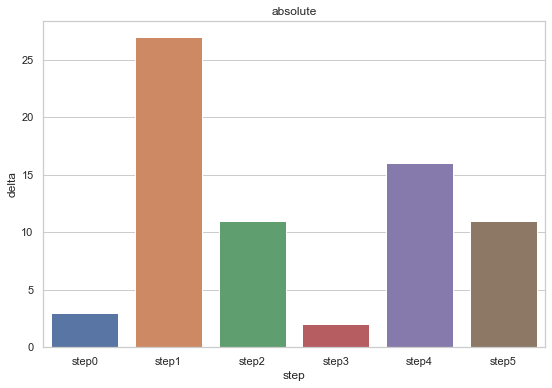

In [210]:
sns.barplot(x='step', y = 'delta',  data=for_bar_plot_and).set_title("absolute");
rcParams['figure.figsize'] = 9,10

Как мы можем заметить, самый большой поток ушедших после <strong>первого</strong> шага. Первые 10 секунд впечатления самые важные. Так что скорее всего, это проблема не туториала, а игра в принципе не понравилась пользователям(стиль, рисовка, анимации) так что мы можем не учитывать этих людей при анализе туториала.

После <strong>третьего</strong> шага обучения ушло меньше всего людей(2 на тысячу) это может быть связано с тем, что "получить подарок" это действие, которое выполняется в один шаг и так сложилось, то людям эволюционно приятно получать вознаграждения за действия.(бесплатные бонусы за ежедневный заход в игру, например.

в глаза бросается самый значительный отток пользователей во время обучения(не считая первого) после <strong>четвертого</strong> шага, возможно, это связано с тем, что это "сложно"(об этом позже).

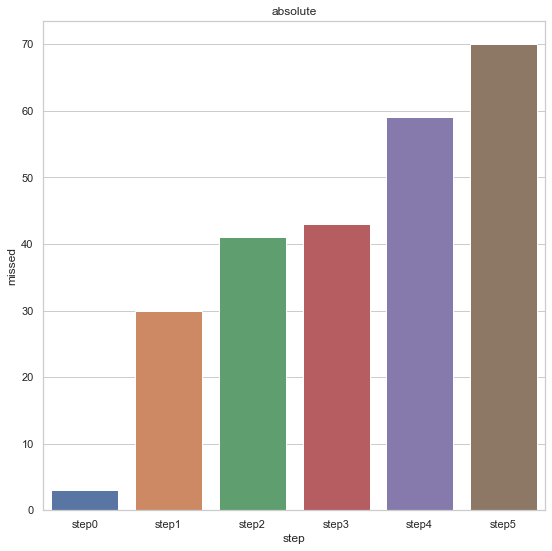

In [219]:
sns.barplot(x='step', y = 'missed',  data=for_bar_plot_and).set_title("absolute");
rcParams['figure.figsize'] = 9,6

Очевидно, что на следующем этапе не может быть меньше пропусков, чем на предыдущем, потому что нельзя пропускать шаги в обучении.

Но есть большая <strong>проблема</strong>, наблюдений слишком мало, чтобы делать какие то выводы, на основе которых можно принимать решения

## Предобработка и анализ data_ok

In [30]:
data_ok.head()

,ID игрока,Платформа,Туториал: Начало,Туториал: Шаг 1,Туториал: Шаг 2,Туториал: Шаг 3,Туториал: Шаг 4,Туториал: Шаг 5
0,46409470,Direct OK,Шаг 0,NaN,NaN,NaN,NaN,NaN
1,46409474,Direct OK,Шаг 0,Шаг 1,Шаг 2,Шаг 3,Шаг 4,NaN
2,46410059,Direct OK,Шаг 0,Шаг 1,Шаг 2,Шаг 3,Шаг 4,Шаг 5
3,46410215,Direct OK,Шаг 0,NaN,NaN,NaN,NaN,NaN
4,46410497,Direct OK,Шаг 0,NaN,NaN,NaN,NaN,NaN


In [118]:
data_ok.columns = ['id', 'platform', 'step0', 'step1', 'step2', 'step3', 'step4', 'step5']
data_ok.columns

Index(['id', 'platform', 'step0', 'step1', 'step2', 'step3', 'step4', 'step5'], dtype='object')

Здесь работает та же самая логика, что и в прошлом случае

In [120]:
for i in ['step0', 'step1', 'step2', 'step3', 'step4', 'step5']:
    print(f'{i} - {data_ok[i].unique()}')

step0 - ['Шаг 0' nan]
step1 - [nan 'Шаг 1']
step2 - [nan 'Шаг 2']
step3 - [nan 'Шаг 3']
step4 - [nan 'Шаг 4']
step5 - [nan 'Шаг 5']


In [121]:
for i in ['step0', 'step1', 'step2', 'step3', 'step4', 'step5']:
    data_ok[i] = data_ok[i].apply(step_to_bin)

In [122]:
for i in ['step0', 'step1', 'step2', 'step3', 'step4', 'step5']:
    print(f'{i} - {data_ok[i].unique()}')

step0 - [1 0]
step1 - [0 1]
step2 - [0 1]
step3 - [0 1]
step4 - [0 1]
step5 - [0 1]


In [230]:
for_bar_plot_ok = []

In [231]:
for i in ['step0', 'step1', 'step2', 'step3', 'step4', 'step5']:
    for_bar_plot_ok.append(data_ok[i].value_counts()[0])
    print(f'{i} - {data_ok[i].value_counts()}')

step0 - 1    1873
0     119
Name: step0, dtype: int64
step1 - 1    1329
0     663
Name: step1, dtype: int64
step2 - 1    1199
0     793
Name: step2, dtype: int64
step3 - 1    1179
0     813
Name: step3, dtype: int64
step4 - 1    1083
0     909
Name: step4, dtype: int64
step5 - 0    1003
1     989
Name: step5, dtype: int64


In [232]:
for_bar_plot_ok = pd.DataFrame(data = {'step' : ['step0', 'step1', 'step2',
                                                  'step3', 'step4', 'step5'], 
                                        'missed' : for_bar_plot_ok})
for_bar_plot_ok['delta'] = for_bar_plot_ok['missed'] - for_bar_plot_ok['missed'].shift(1).fillna(0).astype('int32')
for_bar_plot_ok['relative'] = for_bar_plot_ok['delta']/data_ok.shape[0]
for_bar_plot_ok

,step,missed,delta,relative
0,step0,119,119,0.059739
1,step1,663,544,0.273092
2,step2,793,130,0.065261
3,step3,813,20,0.010040
4,step4,909,96,0.048193
5,step5,1003,94,0.047189


Цифры выглядят подозрительно большими, анализ говорит нам о том, что почти половина пользователей не завершило туториал. Что довольно много. Возможно, есть проблема с данными, возможно проблема в чем-то другом. Нужно оценить распределение, чтобы делать какие-то выводы.

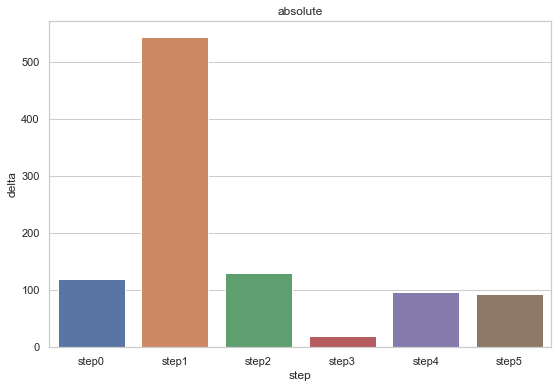

In [220]:
sns.barplot(x='step', y = 'delta',  data=for_bar_plot_ok).set_title("absolute");

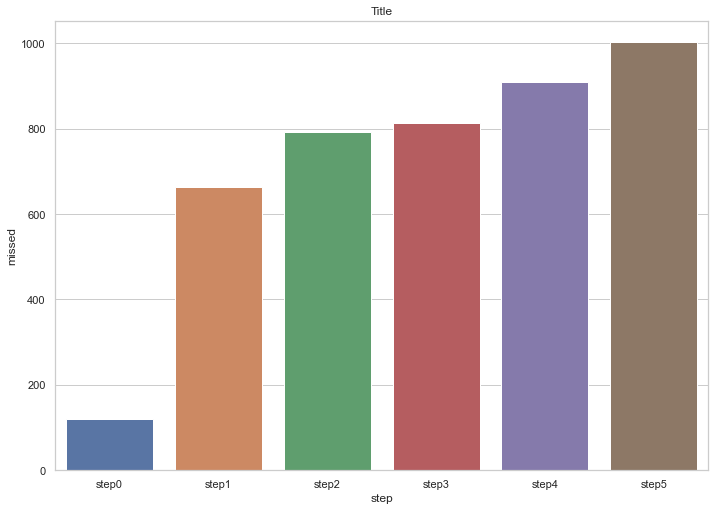

In [181]:
sns.barplot(x='step', y = 'missed',  data=for_bar_plot_ok).set_title("delta");
rcParams['figure.figsize'] = 20.7,8.27

выше представлена столбчатая диаграмма абсолютных значений, для контекста

## Сравнение и выводы

fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

Давайте подготовим данные для финального графика

In [228]:
for_bar_plot_ok

,and,ok
0,0.003006,0.059739
1,0.027054,0.273092
2,0.011022,0.065261
3,0.002004,0.010040
4,0.016032,0.048193
5,0.011022,0.047189


In [267]:
data_final = pd.DataFrame(data = {'step' : ['step0', 'step1', 'step2',
                                                  'step3', 'step4', 'step5'],
                                  'and' : for_bar_plot_and['relative'], 
                                  'ok' : for_bar_plot_ok['relative']
                                                    })
data_final

,step,and,ok
0,step0,0.003006,0.059739
1,step1,0.027054,0.273092
2,step2,0.011022,0.065261
3,step3,0.002004,0.010040
4,step4,0.016032,0.048193
5,step5,0.011022,0.047189


In [276]:
data_final['ok'].sum()

0.5035140562248996

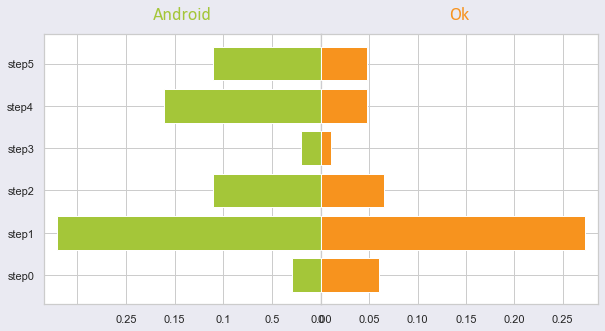

In [272]:
fig, axes = plt.subplots(figsize=(10,5), facecolor='#eaeaf2', ncols=2, sharey=True)
fig.tight_layout() 

axes[0].barh(data_final['step'], data_final['and'], align='center', color='#a4c639', zorder=10);
axes[0].set_title('Android', fontsize=18, pad=15, color='#a4c639', **{'fontname':'Calibri'});
axes[1].barh(data_final['step'], data_final['ok'], align='center', color='#f7931e', zorder=10);
axes[1].set_title('Ok', fontsize=18, pad=15, color='#f7931e', **{'fontname':'Calibri'});

axes[0].invert_xaxis()

axes[0].set_xticklabels([0, 0.5, 0.1, 0.15, 0.25]);

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

Распределения схожи, это может значить, что c данными все в порядке.

In [285]:
print(f'{round(data_final["and"].sum(), 2)}% игроков не закончило туториал на Android')
print(f'{round(data_final["ok"].sum(), 2)}% игроков не закончило туториал в Одноклассниках')

0.07% игроков не закончило туториал на Android
0.5% игроков не закончило туториал в Одноклассниках


### Вывод
Как упоминалось ранее, обучение мне показалось <strong>усложненным</strong>. В том плане, что туториал должен показывать тебе основные механики игры, которые ты сам в дальнейшем изучаешь. Но ваш туториал, для аккаунта, где пол указан мужской,  сосредоточен скорее на завлечении (диалоги в начале, первая приложенная картинка) в игру, чем на обучении. например, после 4 шага идет относительно долгая линия диалога с новым персонажем, возможно, это повлияло на отток пользователей.

Есть вопросы к вышеупомянутым диалогам. Визуальная часть выглядит красиво, приятной внешности девушка заинтересована в пользователе, но хоть это далеко не основная часть игры, пользователю приятно, когда его <strong>выбор на что-то влияет</strong>, но опции в диалоге приводят к одним и тем же последствиям.

Самое явное в нашем анализе, что в Одноклассниках почти половина людей не прошла обучение до конца. Я прошел обучение на обеих платформах с мужским профилем и разницы не заметил, так что, скорее всего, это связанно с особенностями сообществ. В основном Одноклассниками пользуется <strong>старшее поколение</strong> (ниже ссылка со статистикой).

С обучением для аккаунтов, где указан женский пол все интереснее. Там нет ранее затронутых вступлений,<strong>просто указания</strong>  на действия(вторая картинка). И тут вопрос, намеренно ли было принято такое решение? возможно это оправданно тем, что женщинам со старта проявляется больше внимания, чем мужчинам и не надо ничего придумывать чтобы абузить эволюционные механизмы женщин, чтобы игра понравилась(подробнее в статье, ссылка на которую находится ниже)

<strong>ИТОГ</strong> 

я советую вам: 

<ul>
  <li>Провести A/B-тестирование, чтобы проверить как сокращение количества повествования и увеличение обучающей части скажется на проходимости туториала.</li>
  <li>Переработать систему диалогов</li>
  <li>Провести исследование целевой аудитории</li>
  <li>Больше внимания уделить аккаунтам, у которых указан женский пол</li>
</ul>


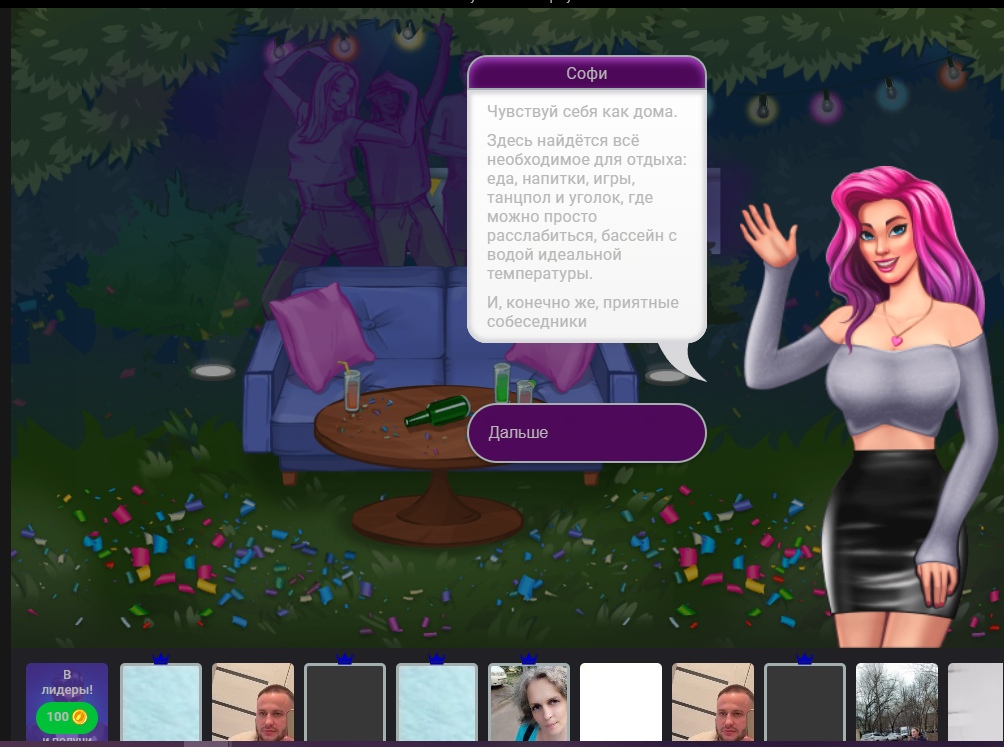

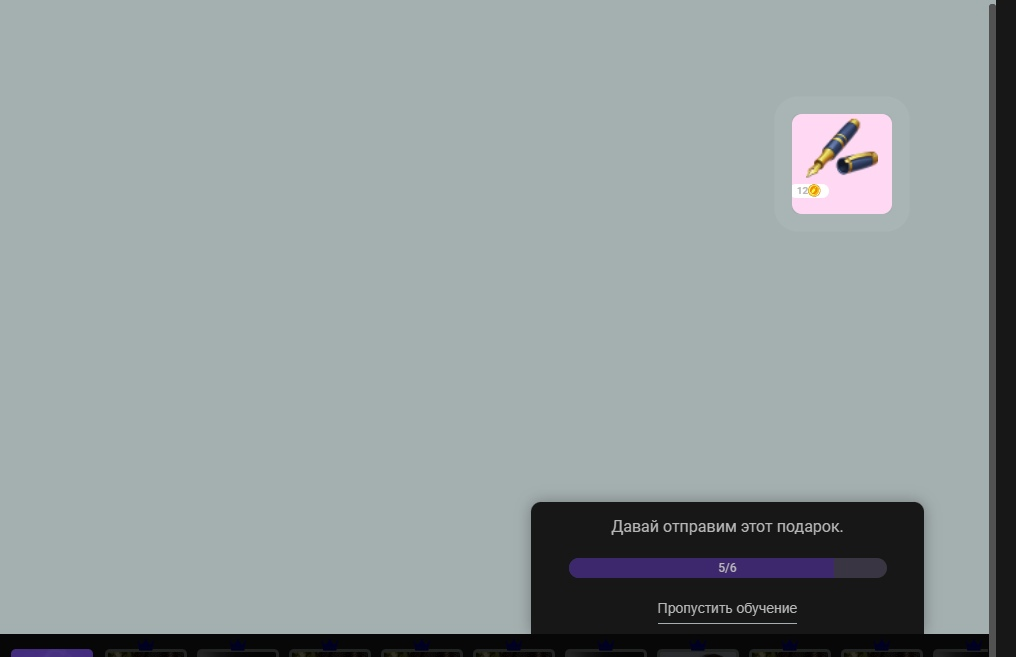

<ul>
  <li>Аудитория одноклассников - https://popsters.ru/blog/post/auditoriya-socsetey-v-rossii#:~:text=%D0%90%D1%83%D0%B4%D0%B8%D1%82%D0%BE%D1%80%D0%B8%D1%8F%20%D0%9E%D0%B4%D0%BD%D0%BE%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%BD%D0%B8%D0%BA%D0%B8&text=%D0%92%20%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BC%20%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%20%D0%BF%D1%80%D0%BE%D0%B2%D0%BE%D0%B4%D0%B8%D1%82%20%D0%B2,%D0%B2%D0%BE%D0%B7%D1%80%D0%B0%D1%81%D1%82%D0%BD%D0%BE%D0%B9%20%D0%B3%D1%80%D1%83%D0%BF%D0%BF%D1%8B%2012%2D24%20%D0%B3%D0%BE%D0%B4%D0%B0.</li>
</ul>


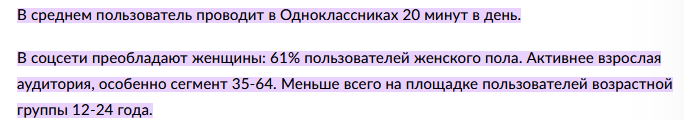

<ul>
  <li>Про тиндер https://vc.ru/services/118899-mehaniki-tinder-psihologiya-igry-lyubov-dengi
</ul>       